In [1]:
import pandas as pd
import numpy as np
import requests
import io
import matplotlib.pyplot as plt
%matplotlib inline
url = "https://raw.githubusercontent.com/Shivaani09/Score_for_Attendence/main/Score_for_Attendance.csv" 
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

print (df.head())

    Attendance   Score
0            5     1.0
1           10     2.5
2           15     5.0
3           20     7.5
4           25    10.0


In [2]:
print (df.tail())

     Attendance   Score
15           80    37.5
16           85    40.0
17           90    42.5
18           95    45.0
19          100    50.0


In [3]:
print (df.describe())

        Attendance      Score
count    20.000000  20.000000
mean     52.500000  23.925000
std      29.580399  14.928139
min       5.000000   1.000000
25%      28.750000  11.875000
50%      52.500000  23.750000
75%      76.250000  35.625000
max     100.000000  50.000000


In [4]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0    Attendance  20 non-null     int64  
 1    Score       20 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes
None


In [6]:
X = df.iloc[:,:-1].values   #"SCATTER PLOT" indicates positive linear relationship
Y = df.iloc[:,1].values
X

array([[  5],
       [ 10],
       [ 15],
       [ 20],
       [ 25],
       [ 30],
       [ 35],
       [ 40],
       [ 45],
       [ 50],
       [ 55],
       [ 60],
       [ 65],
       [ 70],
       [ 75],
       [ 80],
       [ 85],
       [ 90],
       [ 95],
       [100]])

In [7]:
Y

array([ 1. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ,
       27.5, 30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 50. ])

In [8]:
from sklearn.model_selection import train_test_split    #Preparing Data and splitting into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 0,test_size=0.2)

In [9]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (16, 1)
Y train.shape = (16,)
X test.shape  = (4, 1)
Y test.shape  = (4,)


In [10]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [11]:
#Fitting Training Data
linreg.fit(X_train,Y_train)
print("Training our algorithm is finished")

Training our algorithm is finished


In [12]:
print("B0 =",linreg.intercept_,"\nB1 =",linreg.coef_)

B0 = -2.225235849056599 
B1 = [0.49575472]


In [13]:
Y0 = linreg.intercept_ + linreg.coef_*X_train

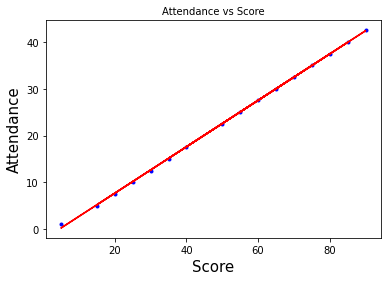

In [20]:
plt.scatter(X_train,Y_train,color='blue',marker='.')
plt.plot(X_train,Y0,color='red')
plt.xlabel("Score",fontsize=15)
plt.ylabel("Attendance",fontsize=15)
plt.title("Attendance vs Score",fontsize=10)
plt.show()

In [16]:
Y_pred=linreg.predict(X_test)
print(Y_pred)

[44.87146226  2.73231132 47.35023585 20.08372642]


In [17]:
Y_test

array([45. ,  2.5, 50. , 20. ])

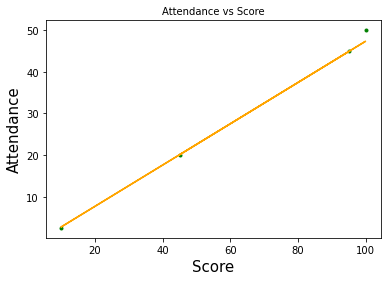

In [19]:
plt.plot(X_test,Y_pred,color='orange')
plt.scatter(X_test,Y_test,color='green',marker='.')
plt.xlabel("Score",fontsize=15)
plt.ylabel("Attendance",fontsize=15)
plt.title("Attendance vs Score",fontsize=10)
plt.show()

In [21]:
Y_test1 = list(Y_test)
prediction=list(Y_pred)
df_compare = pd.DataFrame({ 'Actual':Y_test1,'Result':prediction})
df_compare

,Actual,Result
0,45.0,44.871462
1,2.5,2.732311
2,50.0,47.350236
3,20.0,20.083726


In [22]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9952025338677948

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
Abs_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)
print("Mean Absolute Error     = ",Abs_E)

Mean Squared Error      =  1.7746876668743354
Root Mean Squared Error =  1.332174037757205
Mean Absolute Error     =  1.332174037757205


In [26]:
Prediction_score = linreg.predict([[95]])
print("Predicted score for attending 95% of classes out of 50 :",Prediction_score)

Predicted score for attending 95% of classes out of 50 : [44.87146226]
